# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [2]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

In [3]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [4]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
#url = Ruta + "datasets/iris/iris.csv"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [5]:
print(dataset.shape)

dataset.head()

(150, 5)


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [7]:
dataset = dataset .dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [8]:
# Encoding the categorical column
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

#Visualize the dataset
dataset

C:\Users\diego\AppData\Local\Temp\ipykernel_17748\3891942804.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [9]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

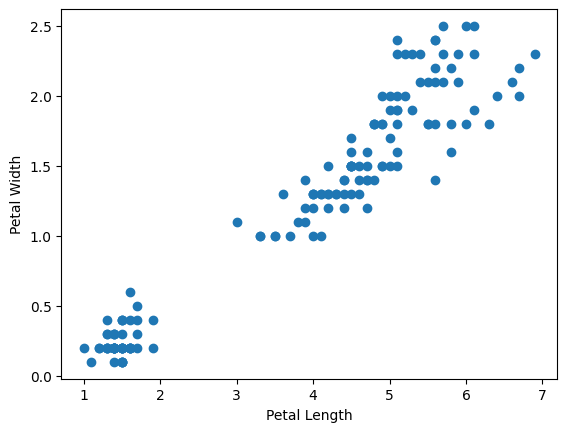

In [10]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


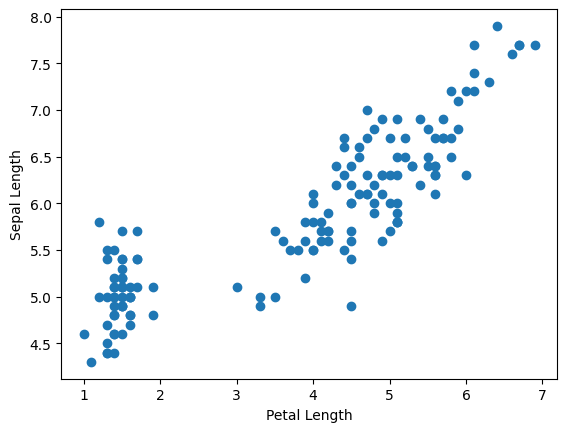

In [11]:
# Scatter plot of Petal_Length vs Sepal_Length
plt.scatter(dataset.Petal_Length,dataset.Sepal_Length)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Length')
plt.show()


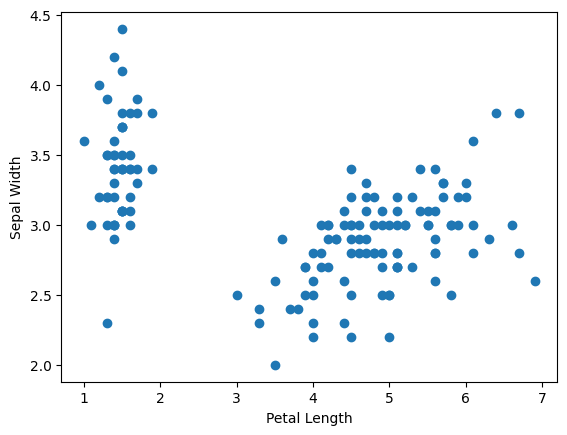

In [12]:
# Scatter plot of Petal_Length vs Sepal_Width
plt.scatter(dataset.Petal_Length,dataset.Sepal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Sepal Width')
plt.show()


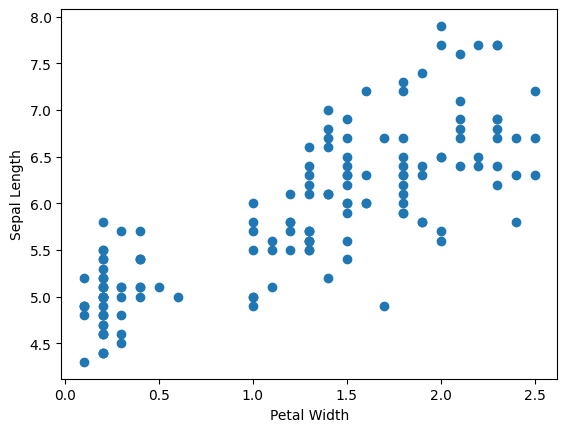

In [13]:
# Scatter plot of Petal_Width vs Sepal_Length
plt.scatter(dataset.Petal_Width,dataset.Sepal_Length)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()


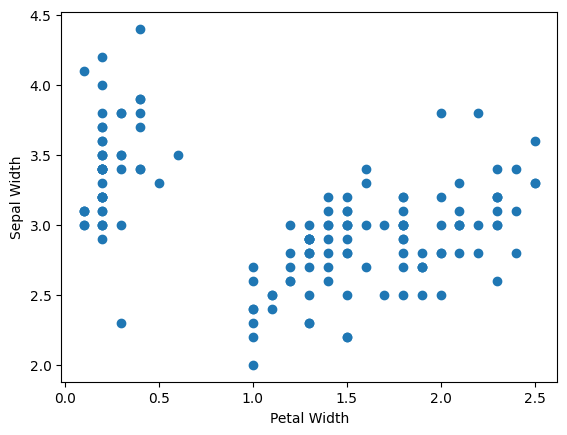

In [14]:
# Scatter plot of Petal_Width vs Sepal_Width
plt.scatter(dataset.Petal_Width,dataset.Sepal_Width)
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.show()


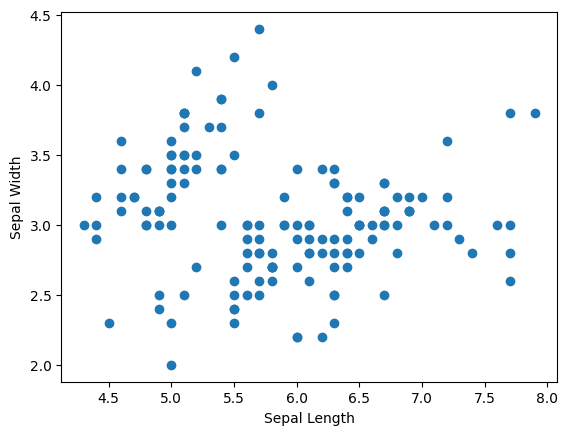

In [15]:
# Scatter plot of Sepal_Length vs Sepal_Width
plt.scatter(dataset.Sepal_Length,dataset.Sepal_Width)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()


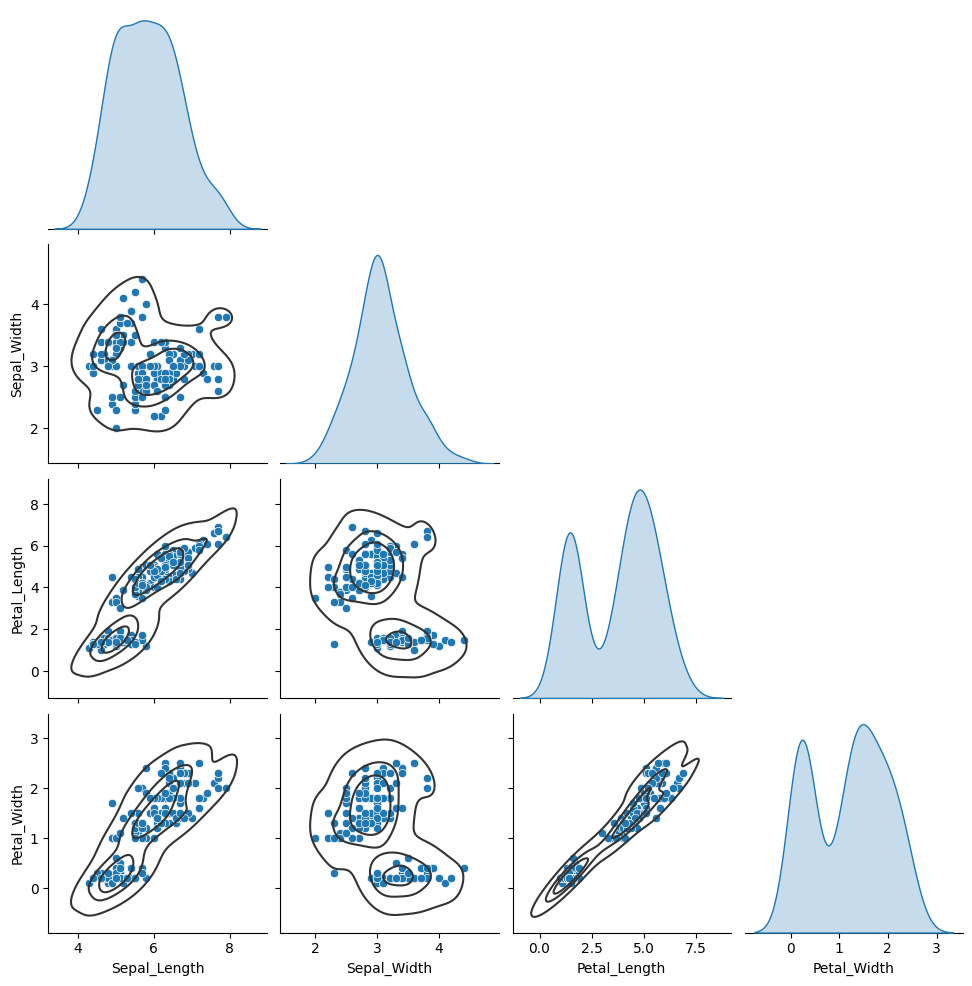

In [16]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


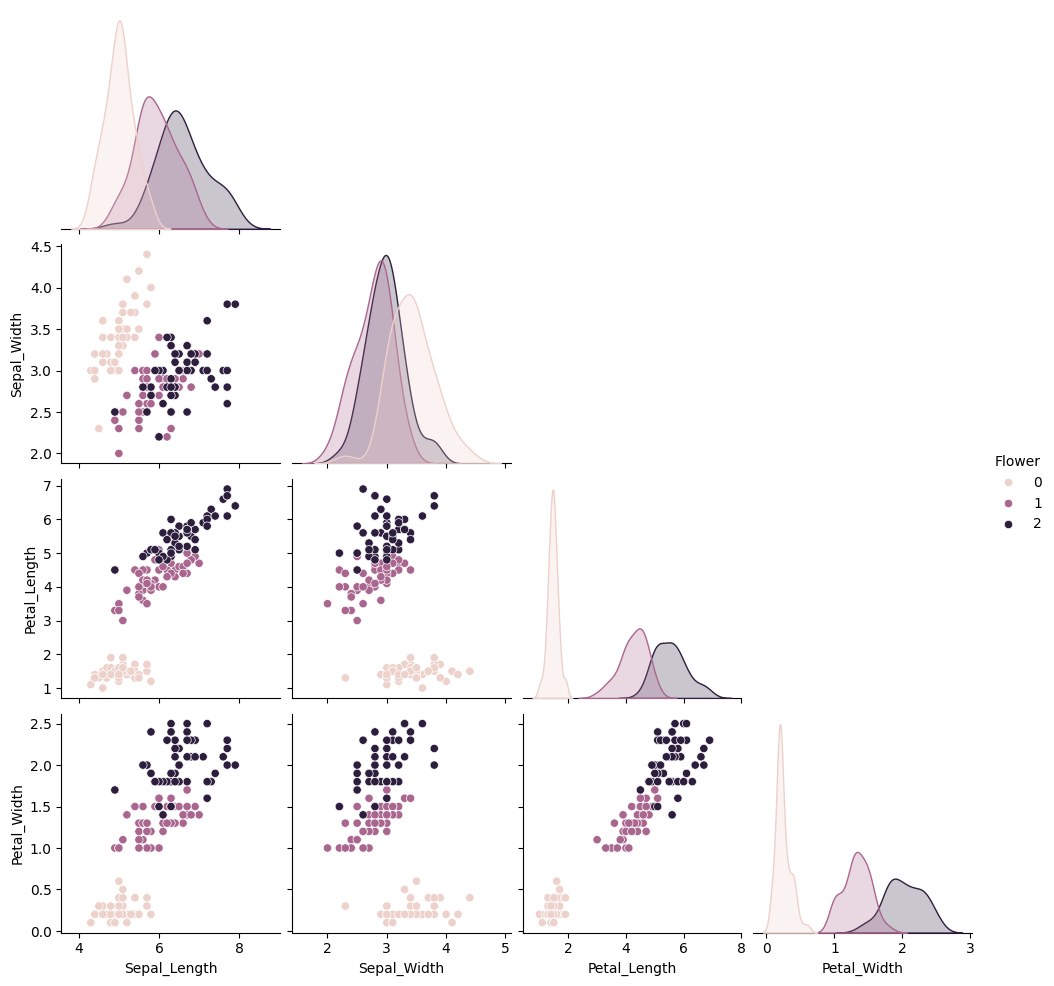

In [17]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset, corner=True, diag_kind="kde", hue='Flower')
#g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [18]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]


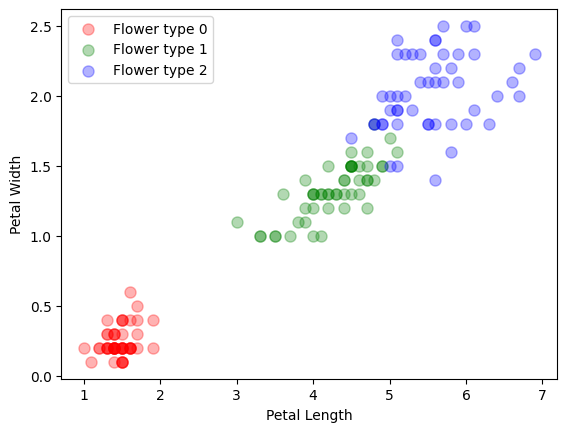

In [19]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()


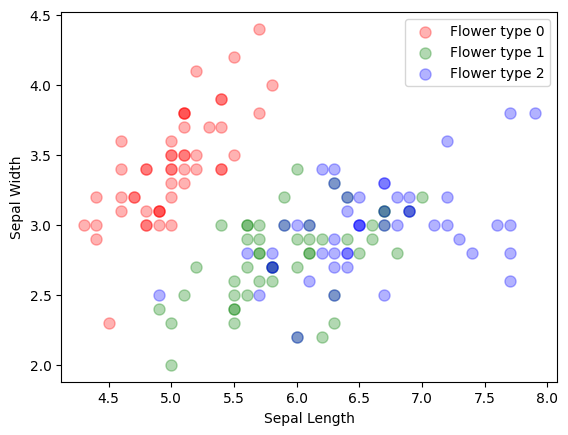

In [20]:
# Scatter plot of each real cluster for Sepal
plt.scatter(df1.Sepal_Length, df1.Sepal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Sepal_Length, df2.Sepal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Sepal_Length, df3.Sepal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()


Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [21]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
#FlowerPred = km.fit_predict(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']])
#FlowerPred = km.fit_predict(dataset[['Sepal_Length','Sepal_Width']])
Cluster1 = km.fit_predict(dataset[['Petal_Length','Petal_Width']] )

# Print estimated cluster of each observations in the dataset
Cluster1


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [22]:
# Print real cluster of each observations in the dataset
dataset.Flower.values


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [23]:
# Manual pairing of the labels of the estimated clusters with the real ones
Cluster1Paired = np.choose(Cluster1, [2, 0, 1]).astype(int) # CHANGE USING THE ORDER THE LABEL ESTIMATED
Cluster1Paired


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [217]:
# Automatic pairing of the labels of the estimated clusters with the real ones: WORK IN PROGRESS

# Import library
# from sklearn.metrics.pairwise import pairwise_distances_argmin

# Centroides of the real clusters
#real_cluster_centers  =

# Centroides of the estimated clusters
#esti_cluster_centers  = km2.cluster_centers_

# Compute order for the estimated clusters
#order = pairwise_distances_argmin(real_cluster_centers, esti_cluster_centers )

# Get ordered estimated clusters
#esti_cluster_centers = esti_cluster_centers[order]

# Get paired labels
#real_cluster_labels = pairwise_distances_argmin(X, real_cluster_centers)
#esti_cluster_lables = pairwise_distances_argmin(X, esti_cluster_centers)


# NOTE: Use info in https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#establishing-parity-between-clusters

In [24]:
# Add a new column to the dataset with the cluster information
dataset['Cluster1'] = Cluster1Paired

dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster1
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


In [25]:
# Print the existing labels/names of the estimated clusters (use the method unique)
dataset.Cluster1.unique()


array([2, 1, 0])

In [26]:
# Print cluster centroides
km.cluster_centers_

# NOTE: centroides also need to be paired


array([[1.464     , 0.244     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [27]:
# Print sum of squared error (sse) of the final model
km.inertia_


31.387758974358977

In [28]:
# Print the number of iterations required to converge
km.n_iter_


5

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters


## Plot estimated clusters and centrodes

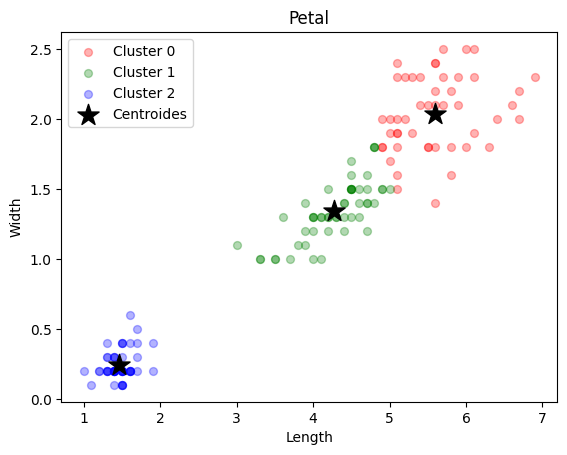

In [29]:
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0', c='r', marker='o', s=32, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1', c='g', marker='o', s=32, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2', c='b', marker='o', s=32, alpha=0.3)

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

## Plot both real and estimated clusters to check for errors

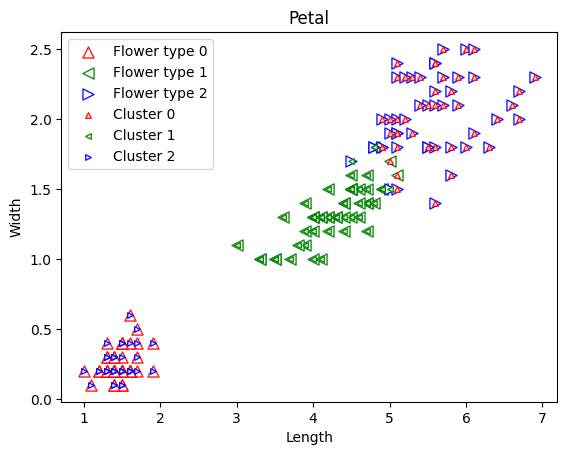

In [224]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

# Scatter plot of each real cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='white', edgecolor='r', marker='^', s=64, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='white', edgecolor='g', marker='<', s=64, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='white', edgecolor='b', marker='>', s=64, alpha=0.9)

# Get dataframes for each estimated cluster
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]

# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0',      c='white', edgecolor='r', marker='^', s=16, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1',      c='white', edgecolor='g', marker='<', s=16, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2',      c='white', edgecolor='b', marker='>', s=16, alpha=0.9)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

#plt.xlim(4,6)
#plt.ylim(1,2)

plt.show()

## Compute performance

How good was the culterization?

NOTE: esto solo que puede hacer si el pairing quedo bien hecho

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [225]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)

# For each k
for k in k_rng:
    # Create model
    km = KMeans(n_clusters=k, n_init="auto")
    # Do K-means clustering
    km.fit_predict(dataset[['Petal_Length','Petal_Width']])
    # Save sse for each k
    sse.append(km.inertia_)


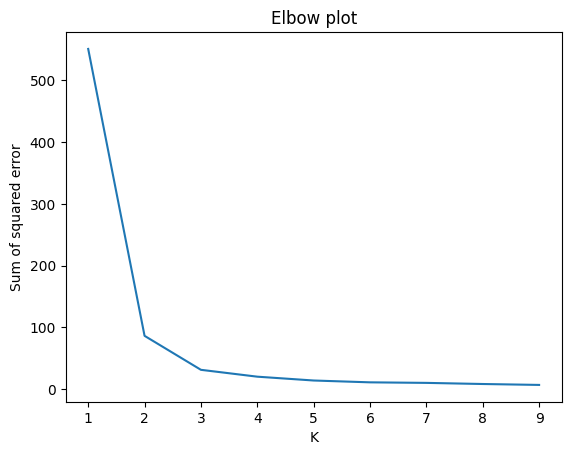

In [226]:
# Plot sse versus k
plt.plot(k_rng,sse)

plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.show()


Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



# Selecting K: Silhouette Coefficient

Selecting the number of clusters **k** using the silhouette coefficient

In [227]:
# A list holds the silhouette coefficients for each k
#silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
#for k in range(2, 11):
#    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
#    kmeans.fit(scaled_features)
#    score = silhouette_score(scaled_features, kmeans.labels_)
#    silhouette_coefficients.append(score)

In [228]:
"""

# Intialize a list to hold silhouette coefficients
silhouette_coefficients = []

# Define values of k
k_rng = range(1,10)

# Parametrs
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

# For each k
for k in k_rng:
    # Create model
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    # Do K-means clustering
    kmeans.fit_predict(df[['Petal_Length','Petal_Width']])
    # Compute silhouette coefficient
    score = silhouette_score(df[['Petal_Length','Petal_Width']], kmeans.labels_)
    # Save silhouette coefficient for each k
    silhouette_coefficients.append(score)
"""

'\n\n# Intialize a list to hold silhouette coefficients\nsilhouette_coefficients = []\n\n# Define values of k\nk_rng = range(1,10)\n\n# Parametrs\nkmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}\n\n# For each k\nfor k in k_rng:\n    # Create model\n    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)\n    # Do K-means clustering\n    kmeans.fit_predict(df[[\'Petal_Length\',\'Petal_Width\']])\n    # Compute silhouette coefficient\n    score = silhouette_score(df[[\'Petal_Length\',\'Petal_Width\']], kmeans.labels_)\n    # Save silhouette coefficient for each k\n    silhouette_coefficients.append(score)\n'

In [229]:
"""
# Plot silhouette coefficient versus k
plt.plot(k_rng,silhouette_coefficients)

plt.title('Silhouette Coefficients')
plt.xlabel('K')
plt.ylabel('silhouette_coefficients')
plt.show()
"""

"\n# Plot silhouette coefficient versus k\nplt.plot(k_rng,silhouette_coefficients)\n\nplt.title('Silhouette Coefficients')\nplt.xlabel('K')\nplt.ylabel('silhouette_coefficients')\nplt.show()\n"

# Normalizing the data: preprocessing using min max scaler

Normalizing the data: preprocessing using min max scaler

In [230]:
"""
# Import library
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()
"""

'\n# Import library\nfrom sklearn.preprocessing import MinMaxScaler\n\n# Initialize scaler\nscaler = MinMaxScaler()\n'

In [231]:
"""
# Scale data
scaler.fit(df[['Petal_Length']])
df['Petal_Length_Scaled'] = scaler.transform(df[['Petal_Length']])

scaler.fit(df[['Petal_Width']])
df['Petal_Width_Scaled'] = scaler.transform(df[['Petal_Width']])

df
"""

"\n# Scale data\nscaler.fit(df[['Petal_Length']])\ndf['Petal_Length_Scaled'] = scaler.transform(df[['Petal_Length']])\n\nscaler.fit(df[['Petal_Width']])\ndf['Petal_Width_Scaled'] = scaler.transform(df[['Petal_Width']])\n\ndf\n"

In [232]:
#dataset.describe()

In [233]:
"""
# Scatter plot of the scaled data
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()
"""

"\n# Scatter plot of the scaled data\nplt.scatter(dataset.Petal_Length,dataset.Petal_Width)\nplt.title('Petal')\nplt.xlabel('Length')\nplt.ylabel('Width')\nplt.show()\n"

In [234]:
"""
# Initialize model and define number of clusters
km = KMeans(n_clusters=3)

# Do K-means clustering (assing each point in the dataset to a cluster)
#yp = km.fit_predict(dataset)
yp = km.fit_predict(dataset[['Petal_Length','Petal_Width']])

# Print estimated cluster of each point in the dataser
yp
"""

"\n# Initialize model and define number of clusters\nkm = KMeans(n_clusters=3)\n\n# Do K-means clustering (assing each point in the dataset to a cluster)\n#yp = km.fit_predict(dataset)\nyp = km.fit_predict(dataset[['Petal_Length','Petal_Width']])\n\n# Print estimated cluster of each point in the dataser\nyp\n"

In [235]:
"""
# Add a new column to the dataset with the cluster information
dataset['Cluster2'] = yp

dataset
"""

"\n# Add a new column to the dataset with the cluster information\ndataset['Cluster2'] = yp\n\ndataset\n"

In [236]:
"""
df1 = dataset[dataset.Cluster2==0]
df2 = dataset[dataset.Cluster2==1]
df3 = dataset[dataset.Cluster2==2]

plt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Cluster 0')
plt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Cluster 1')
plt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Cluster 2')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()
"""

"\ndf1 = dataset[dataset.Cluster2==0]\ndf2 = dataset[dataset.Cluster2==1]\ndf3 = dataset[dataset.Cluster2==2]\n\nplt.scatter(df1.Petal_Length, df1.Petal_Width, Label='Cluster 0')\nplt.scatter(df2.Petal_Length, df2.Petal_Width, Label='Cluster 1')\nplt.scatter(df3.Petal_Length, df3.Petal_Width, Label='Cluster 2')\n\nplt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='magenta', marker='*', label='Centroides', s=256)\n\nplt.title('Petal')\nplt.xlabel('Length')\nplt.ylabel('Width')\nplt.legend()\nplt.show()\n"

WORK IN PROGRESS

In [237]:
#Remove all observations from one of the classes

# Discard observation for one of the classes, e.g., class "setosa": to have only two classes in our dataset
#Label2Remove = 3 # (1,2,3)
#df = df[df.Flower!=Label2Remove]
#df

# NOTE: comment this if cell if you want to use the three classes

# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k